In [1]:
#Importing libraries
import os                                                #getting access to input files
import pandas as pd                                      #Importing pandas for performing EDA
import numpy as np                                       #Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt                          #Importing for Data Visualization
import seaborn as sns                                    #Importing for Data Visualization
from sklearn.tree import DecisionTreeRegressor           #Algorithm model
from sklearn.ensemble import RandomForestRegressor       #Algorithm model
from sklearn.ensemble import GradientBoostingRegressor   #Algorithm model
from xgboost import XGBRegressor                         #Algorithm model
from sklearn.preprocessing import StandardScaler         #Data tranformation
from sklearn.linear_model import LinearRegression,ElasticNet,ElasticNetCV        #ML algorithm
from sklearn.model_selection import train_test_split     #splitting dataset
from sklearn.metrics import mean_squared_error           #MSE calculation
from sklearn.metrics import r2_score                     # r2 score calculation
from pprint import pprint                                # more formated and readable way
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV        # model fit purpose 
import pickle                                            #save model
from termcolor import colored                            #text formating
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline      

In [2]:
#Data Injection
df = pd.read_csv("car data.csv")


In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#All data types information
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [5]:
#find number of data 
print("We have {} entries ".format(df.shape[:1]))    


We have (301,) entries 


In [6]:
#find car_name columns give eny inside or not
df.Car_Name.unique()                      

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [7]:
#Car_name feture not give any type of ioformation this column we are drop
df.drop(['Car_Name'],axis=1,inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
#check dataset have null velues or not
df.isnull().sum()   


Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
#check have zeros or not
cal = df.drop(['Owner'],axis=True)           
(cal == 0).sum().sum()

0

In [10]:
#for convert data into num format we are going to check how many types of  unique values in columns

print('Fuel_Type = ',df['Fuel_Type'].unique())
print("-"*40)
print('Seller_Type = ',df['Seller_Type'].unique())
print("-"*40)
print('Transmission = ',df['Transmission'].unique())
print('')

print(colored('This is object type columns and vaues ','red', attrs=['bold']))

Fuel_Type =  ['Petrol' 'Diesel' 'CNG']
----------------------------------------
Seller_Type =  ['Dealer' 'Individual']
----------------------------------------
Transmission =  ['Manual' 'Automatic']

This is object type columns and vaues 


In [11]:
#conver object type to numeric
df.Fuel_Type = df.Fuel_Type.map({'Petrol':1,'Diesel':2,'CNG':3})

df.Seller_Type = df.Seller_Type.map({'Dealer':1,'Individual':2})

df.Transmission = df.Transmission.map({'Manual':1,'Automatic':2})

In [12]:
df['current year']=2022

In [13]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year
0,2014,3.35,5.59,27000,1,1,1,0,2022
1,2013,4.75,9.54,43000,2,1,1,0,2022
2,2017,7.25,9.85,6900,1,1,1,0,2022
3,2011,2.85,4.15,5200,1,1,1,0,2022
4,2014,4.60,6.87,42450,2,1,1,0,2022


In [14]:
#find how many year car is old using year column
df['no_year']=df['current year']- df['Year']

In [15]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year,no_year
0,2014,3.35,5.59,27000,1,1,1,0,2022,8
1,2013,4.75,9.54,43000,2,1,1,0,2022,9
2,2017,7.25,9.85,6900,1,1,1,0,2022,5
3,2011,2.85,4.15,5200,1,1,1,0,2022,11
4,2014,4.60,6.87,42450,2,1,1,0,2022,8


In [16]:
df.drop(['Year'],axis=1,inplace=True)
df.drop(['current year'],axis=1,inplace=True)

In [17]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,1,1,1,0,8
1,4.75,9.54,43000,2,1,1,0,9
2,7.25,9.85,6900,1,1,1,0,5
3,2.85,4.15,5200,1,1,1,0,11
4,4.60,6.87,42450,2,1,1,0,8


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    int64  
 4   Seller_Type    301 non-null    int64  
 5   Transmission   301 non-null    int64  
 6   Owner          301 non-null    int64  
 7   no_year        301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [19]:
#check information about dataset
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,1.212625,1.352159,1.132890,0.043189,8.372093
std,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,2.891554
min,0.100000,0.320000,500.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,0.900000,1.200000,15000.000000,1.000000,1.000000,1.000000,0.000000,6.000000
50%,3.600000,6.400000,32000.000000,1.000000,1.000000,1.000000,0.000000,8.000000
75%,6.000000,9.900000,48767.000000,1.000000,2.000000,1.000000,0.000000,10.000000
max,35.000000,92.600000,500000.000000,3.000000,2.000000,2.000000,3.000000,19.000000


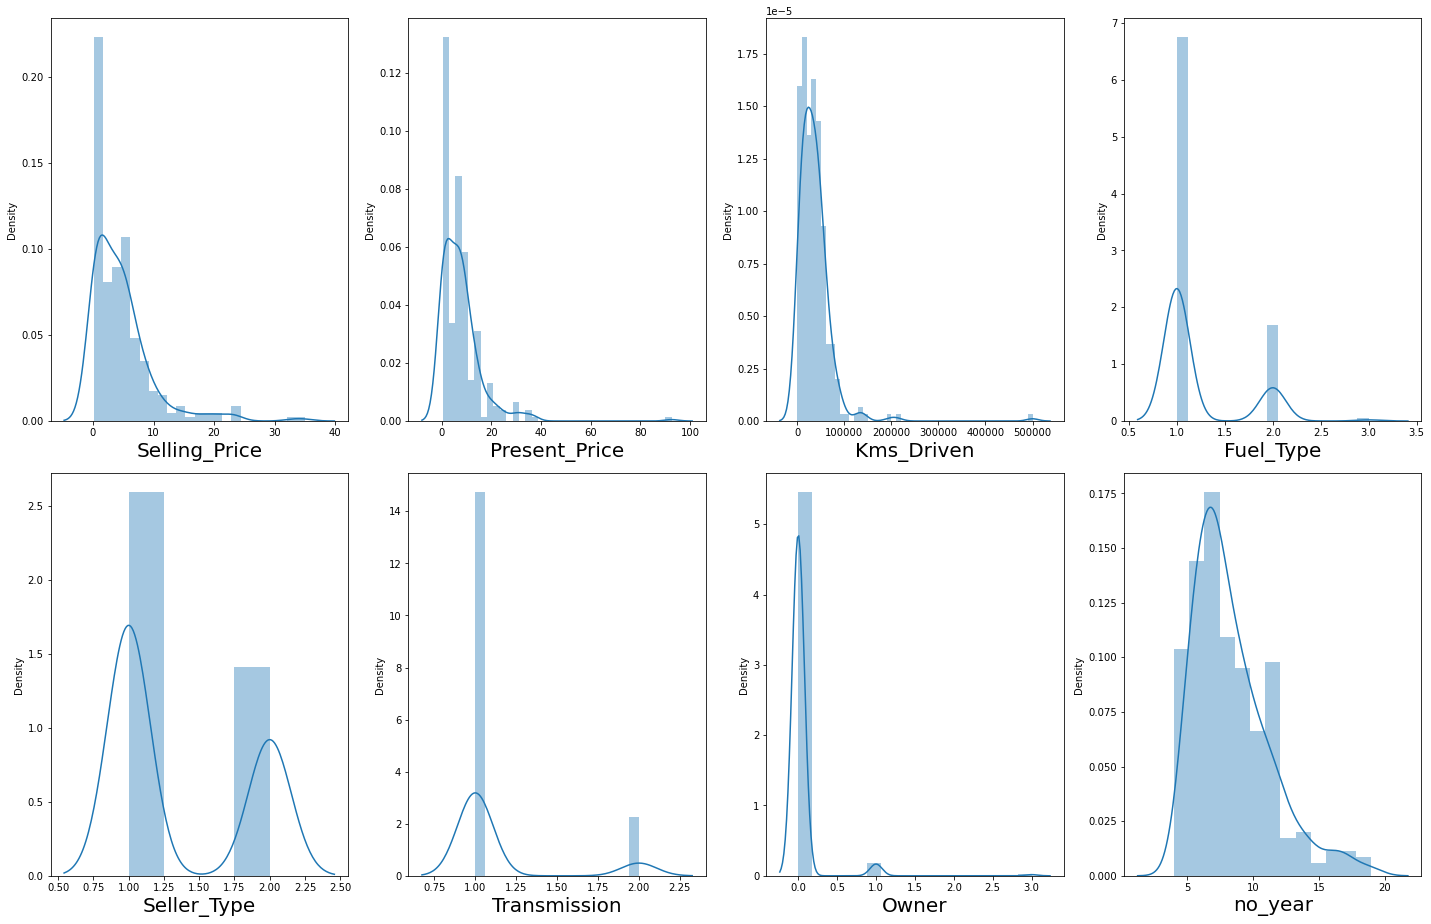

In [20]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

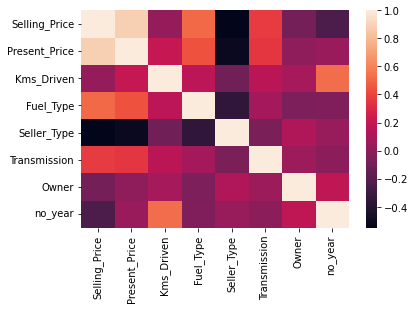

In [21]:
#
sns.heatmap(df.corr())

<AxesSubplot:>

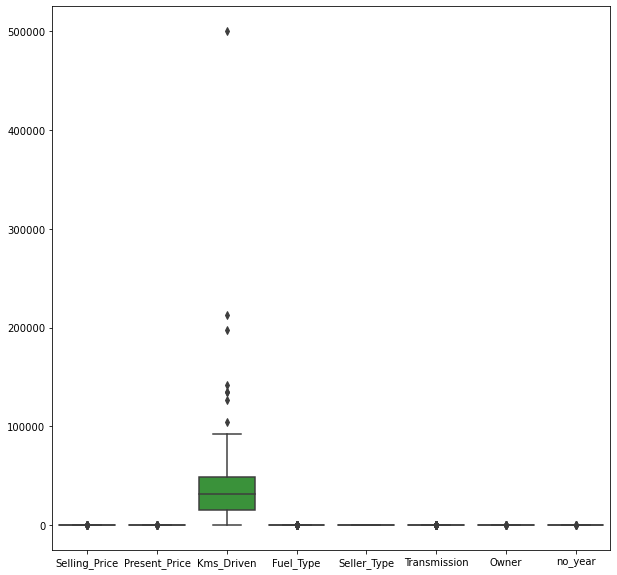

In [22]:
# check outliar checking
plt.figure(figsize=(10,10), facecolor='white')
sns.boxplot(data=df)

In [23]:
#separate features columns
x=df.drop(['Selling_Price'],axis=1)
x.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,5.59,27000,1,1,1,0,8
1,9.54,43000,2,1,1,0,9
2,9.85,6900,1,1,1,0,5
3,4.15,5200,1,1,1,0,11
4,6.87,42450,2,1,1,0,8


In [24]:
#separate target columns
y=df['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

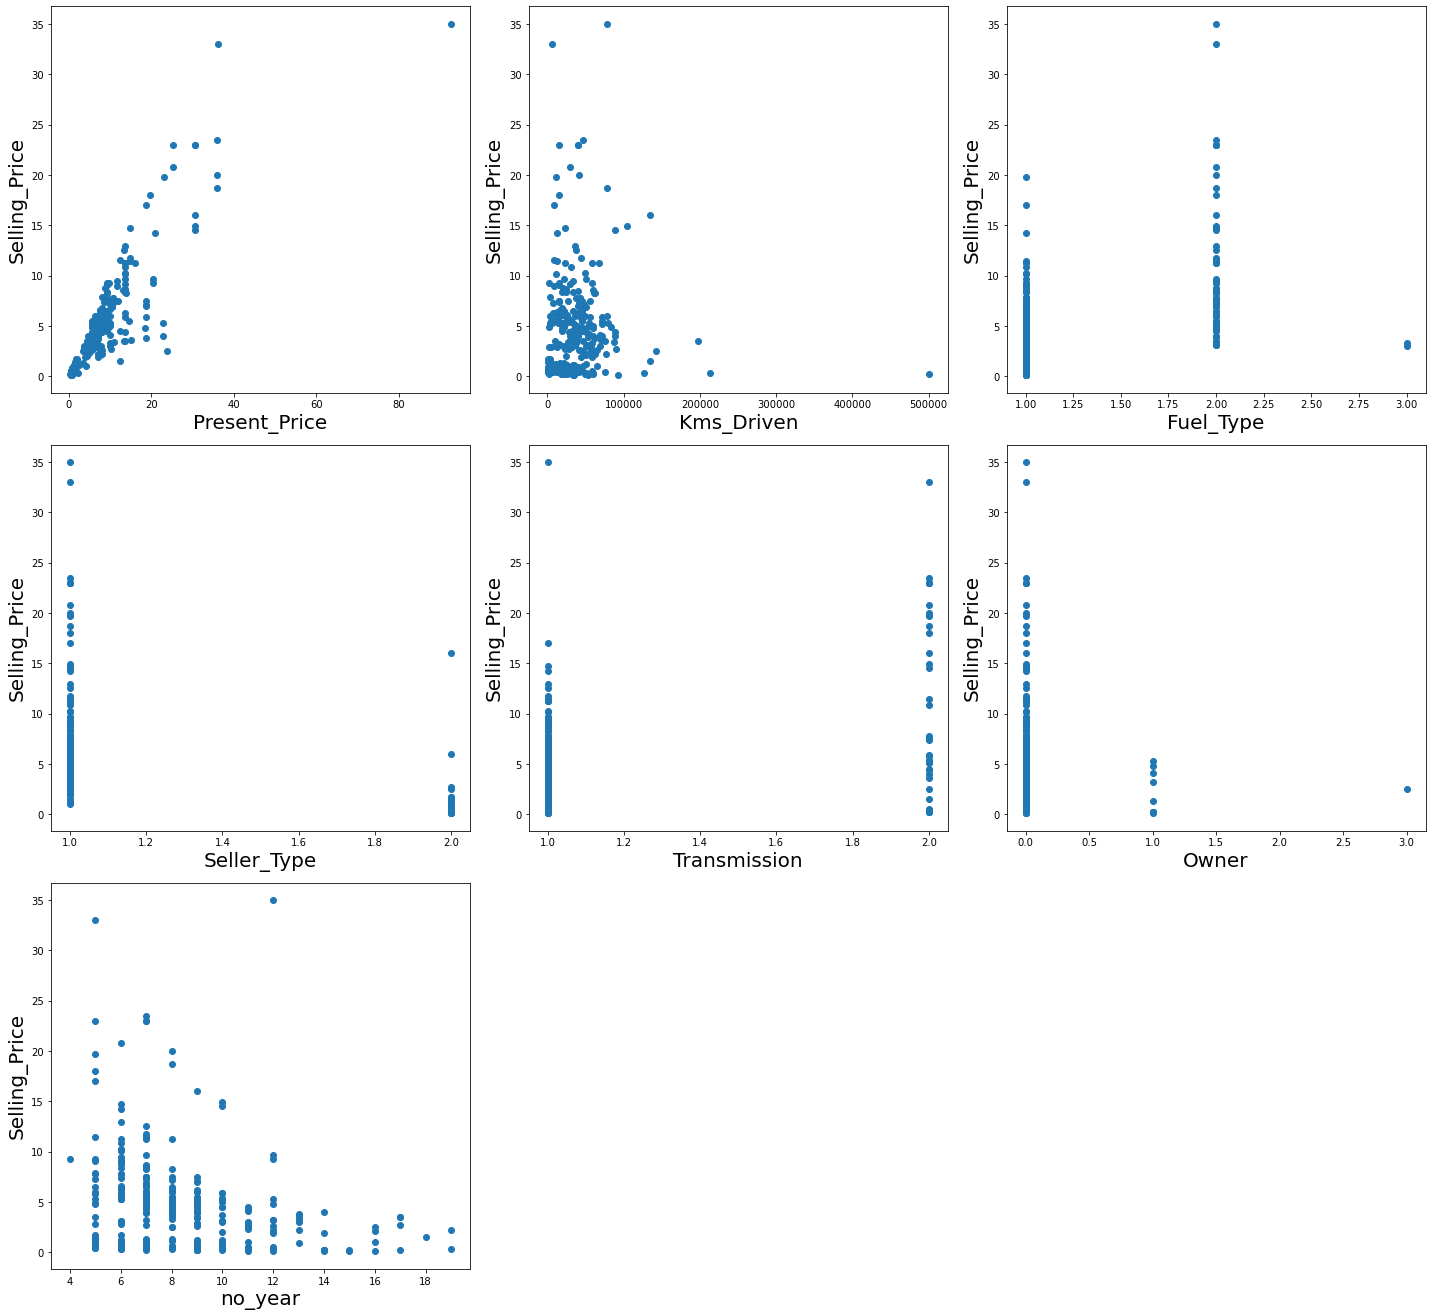

In [25]:
#check how my columns is correlated with selling price
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Selling_Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [28]:
##train test split for further modelling
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=20)

In [29]:
#check data size
print('Total = ',df.shape)
print('-'*20)
print('x_train =',x_train.shape)
print('-'*20)
print('x_test = ',x_test.shape)


Total =  (301, 8)
--------------------
x_train = (240, 7)
--------------------
x_test =  (61, 7)


# Building model on top of training dataset

**LINEAR REGRESSION**

In [30]:
fit_LR = LinearRegression()
fit_LR.fit(x_train , y_train)
#prediction on train data
pred_train_LR = fit_LR.predict(x_train)

#prediction on test data
pred_test_LR = fit_LR.predict(x_test)

#calculate R^2 for train data
r2_train_lr = r2_score(y_train, pred_train_LR)
r2_test_lr = r2_score(y_test, pred_test_LR)




print("R2_Score for known data = ",r2_train_lr)
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_test_lr)




R2_Score for known data =  0.8670919068645727
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.9197483209590995


**XG BOOST**

In [31]:
XGBR =  XGBRegressor(random_state=20)
XGBR.fit(x_train,y_train)
#prediction on train data
pred_train_XGB = XGBR.predict(x_train)

#prediction on test data
pred_test_XGB = XGBR.predict(x_test)

#calculate R^2 for train data
r2_train_xg = r2_score(y_train,pred_train_XGB)
r2_test_xg = r2_score(y_test,pred_test_XGB)


print("R2_Score for known data = ",r2_train_xg)
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_test_xg)



R2_Score for known data =  0.9999945035528602
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.971140355376459


**RANDOM FOREST**

In [32]:
fit_RF = RandomForestRegressor(random_state=20)
fit_RF.fit(x_train,y_train)
#prediction on train data
pred_train_RF = fit_RF.predict(x_train)

#prediction on test data
pred_test_RF = fit_RF.predict(x_test)

## calculate R^2 for train data
r2_train_rf = r2_score(y_train,pred_train_RF)
r2_test_rf = r2_score(y_test,pred_test_RF)



print("R2_Score for known data = ",r2_train_rf)
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_test_rf)



R2_Score for known data =  0.9862069975260841
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.9722398605187302


**ELASTIC NET**

In [33]:
# Elastic net
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

print(elasticCV.alpha_)
print(elasticCV.l1_ratio)

10.692718424999995
0.5


In [34]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
#prediction on train data
pred_train_reg = elasticnet_reg.predict(x_train)

#prediction on test data
pred_test_reg = elasticnet_reg.predict(x_test)

#calculate R^2 for train data
r2_train_en = r2_score(y_train,pred_train_reg)
r2_test_en =r2_score(y_test,pred_test_reg)



print("R2_Score for known data = ",r2_train_en)
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_test_en)

R2_Score for known data =  0.7503442603743535
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.7825766009091504


# Hyper Parameter Optimization

In [35]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum number of levels in a tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required to be at a leaf node.
min_samples_leaf=list(range(1,9,2))

# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
#               "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}



In [36]:
#fit parametes inside the randomCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid ,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, n_jobs = 1)

In [37]:
#Train randomCV for find roberst parametes values 
# rf_random.fit(x_train,y_train)

In [38]:
# rf_random.best_params_

In [39]:
# rf_random.best_score_

In [40]:
rf_tune = RandomForestRegressor(n_estimators = 100,min_samples_split = 3,max_features='auto',min_samples_leaf = 1,random_state=77)
rf_tune.fit(x_train,y_train)
#prediction on train data
pred_train_rf_tune = rf_tune.predict(x_train)

#prediction on test data
pred_test_rf_tune = rf_tune.predict(x_test)

## calculate R^2 for train data
r2_train_trf = r2_score(y_train,pred_train_rf_tune)
r2_test_trf =r2_score(y_test,pred_test_rf_tune)





print("R2_Score for known data = ",r2_train_trf)
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_test_trf)

R2_Score for known data =  0.9797639628370302
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.9707579942428624


# FOR XGB


In [41]:
XGBRT =  XGBRegressor()
## Hyper Parameter Optimization
n_estimators=[10,20,30,40,50,100,200,250,300,360,400,450,500,600,650,700,800]
max_depth=list(range(3,12))
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=list(range(1,10))

# Define the grid of hyperparameters to search
grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    
    }


In [42]:
#fit parametes inside the randomCV
XGBRT_random = RandomizedSearchCV(estimator = XGBRT, param_distributions = grid ,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, n_jobs = 1)

In [43]:
# XGBRT_random.fit(x_train,y_train)

In [44]:
# XGBRT_random.best_params_


In [45]:
XGBRT =  XGBRegressor(n_estimators=300,min_child_weight=2,max_depth= 5,learning_rate=0.15,booster ='gbtree')
XGBRT.fit(x_train,y_train)
#prediction on train data
pred_train_XGBRT = XGBRT.predict(x_train)

#prediction on test data
pred_test_XGBRT = XGBRT.predict(x_test)

#calculate R^2 for train data
r2_train_XGBRT = r2_score(y_train,pred_train_XGBRT)
r2_test_XGBRT = r2_score(y_test,pred_test_XGBRT)


print("R2_Score for known data = ",r2_train_XGBRT)
print('------------------------------------------------------------------------------------')
print("R2_Score for unknown data = ",r2_test_XGBRT)

R2_Score for known data =  0.999983437021578
------------------------------------------------------------------------------------
R2_Score for unknown data =  0.9723923446939942


# Model performance

In [46]:
pd.DataFrame({'Technique': {0: 'LinearRegression', 1: 'XGBoost',2: 'Tune_XGBoost' ,3: 'RandomForestRegressor', 
                            4: 'Tune_RandomForestRegressor' ,5:'Elastic net'}, 
              'R2_train': {0: r2_train_lr, 1: r2_train_xg , 2: r2_train_XGBRT, 3: r2_train_rf, 4: r2_train_trf,5 : r2_train_en}, 'R2_test': {0: r2_test_lr, 1: r2_test_xg , 2:r2_test_XGBRT, 3: r2_test_rf,
                                                                                        4: r2_test_trf,5 : r2_test_en}})

,Technique,R2_train,R2_test
0,LinearRegression,0.867092,0.919748
1,XGBoost,0.999995,0.971140
2,Tune_XGBoost,0.999983,0.972392
3,RandomForestRegressor,0.986207,0.972240
4,Tune_RandomForestRegressor,0.979764,0.970758
5,Elastic net,0.750344,0.782577


Model save

In [47]:
import pickle
# open a file, where you ant to store the data
file = open('XGBRegressor.pickle', 'wb')

# dump information to that file
pickle.dump(XGBRT, file)


# Prediction using final  model

In [49]:
# prediction using the saved model
model = pickle.load(open('XGBRegressor.pickle', 'rb'))

In [50]:
# seperate rows for prediciton 
df.iloc[[0,1,2,3,4]].drop('Selling_Price',axis=1)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,5.59,27000,1,1,1,0,8
1,9.54,43000,2,1,1,0,9
2,9.85,6900,1,1,1,0,5
3,4.15,5200,1,1,1,0,11
4,6.87,42450,2,1,1,0,8


In [51]:
# give values for prediction
pred=loaded_model.predict(df.iloc[[0,1,2,3,4]].drop('Selling_Price',axis=1))

In [52]:
# Check model accuracy manual way
pd.DataFrame({'Actual_values':df['Selling_Price'][0:5],'Model_prediction':pred})

,Actual_values,Model_prediction
0,3.35,4.621244
1,4.75,4.791638
2,7.25,7.255084
3,2.85,2.855132
4,4.60,4.597877


In [53]:

Present_Price=30000
Kms_Driven2=222222
Fuel_Type=2
Seller_Type=1
Transmission=1
Owner=0
Year=8

In [54]:
x_train.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
91,16.09,58242,2,1,1,0,8
232,14.79,12900,1,1,2,0,7
13,7.71,26000,1,1,1,0,7
23,3.46,45280,1,1,1,0,8
33,9.95,45000,2,1,1,0,8


In [55]:
prediction=loaded_model.predict(pd.DataFrame([[Present_Price,Kms_Driven2,Fuel_Type,Seller_Type,Transmission,Owner,Year]]))
prediction

array([27.061079], dtype=float32)